In [ ]:
!pip install alpha_vantage

In [ ]:
import pandas as pd
import numpy as np
from alpha_vantage.timeseries import TimeSeries

In [ ]:
carteira = pd.read_excel("Carteira.xlsx")
data_inicial = "2023-01-09"
display(carteira)

,Ativos,Início
0,ITUB4,10000
1,EGIE3,10000
2,WEGE3,10000
3,BPAC11,10000


In [38]:
acoes = []
for acao in carteira["Ativos"]:
  acoes.append(acao + "SA")

acoes

['ITUB4.SA', 'EGIE3.SA', 'WEGE3.SA', 'BPAC11.SA']

In [40]:
import yfinance as yf


precos = yf.download(acoes , start = data_inicial, progress = False)['Adj Close']

In [41]:
precos

Ticker,BPAC11.SA,EGIE3.SA,ITUB4.SA,WEGE3.SA
Date,,,,
2023-01-09,22.126411,35.274799,23.472475,37.004322
2023-01-10,23.318737,35.340157,23.925112,36.643261
2023-01-11,22.888718,36.292522,24.340799,37.667900
2023-01-12,22.233915,36.236500,23.999012,37.580070
2023-01-13,21.627981,35.330822,23.878925,38.028965
...,...,...,...,...
2024-02-29,36.389999,42.020000,33.922348,36.689999
2024-03-01,36.009998,41.000000,34.070000,37.290001
2024-03-04,36.009998,40.509998,33.810001,37.139999


In [42]:
ibov = yf.download('^BVSP', start = data_inicial)['Adj Close']


[*********************100%%**********************]  1 of 1 completed


Date
2023-01-09    109227.00000
2023-01-10    110912.00000
2023-01-11    111763.00000
2023-01-12    111877.00000
2023-01-13    110916.00000
                  ...     
2024-02-29    129020.00000
2024-03-01    129180.00000
2024-03-04    128341.00000
2024-03-05    128098.00000
2024-03-06    128843.53125
Name: Adj Close, Length: 288, dtype: float64

Date
2023-01-09    109227.00000
2023-01-10    110912.00000
2023-01-11    111763.00000
2023-01-12    111877.00000
2023-01-13    110916.00000
                  ...     
2024-02-29    129020.00000
2024-03-01    129180.00000
2024-03-04    128341.00000
2024-03-05    128098.00000
2024-03-06    128843.53125
Name: Adj Close, Length: 288, dtype: float64

<Axes: xlabel='Date'>

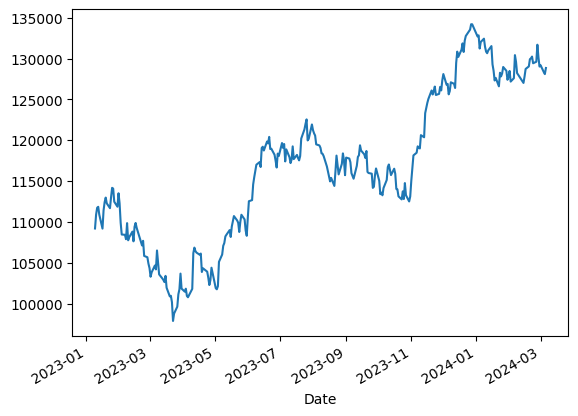

In [44]:
display(ibov)
ibov.plot()

In [45]:
precos["BPAC11.SA"]

Date
2023-01-09    22.126411
2023-01-10    23.318737
2023-01-11    22.888718
2023-01-12    22.233915
2023-01-13    21.627981
                ...    
2024-02-29    36.389999
2024-03-01    36.009998
2024-03-04    36.009998
2024-03-05    35.549999
2024-03-06    35.830002
Name: BPAC11.SA, Length: 288, dtype: float64

In [47]:
tabela_cotacoes = pd.DataFrame()

for acao in precos:
  tabela_cotacoes[acao] = precos[acao].loc[data_inicial:]

display(tabela_cotacoes)

,BPAC11.SA,EGIE3.SA,ITUB4.SA,WEGE3.SA
Date,,,,
2023-01-09,22.126411,35.274799,23.472475,37.004322
2023-01-10,23.318737,35.340157,23.925112,36.643261
2023-01-11,22.888718,36.292522,24.340799,37.667900
2023-01-12,22.233915,36.236500,23.999012,37.580070
2023-01-13,21.627981,35.330822,23.878925,38.028965
...,...,...,...,...
2024-02-29,36.389999,42.020000,33.922348,36.689999
2024-03-01,36.009998,41.000000,34.070000,37.290001
2024-03-04,36.009998,40.509998,33.810001,37.139999


In [48]:
valor_investir = 10000
quantidade_acoes = []

for acao in carteira["Ativos"]:
    preco_inicial = tabela_cotacoes[acao + ".SA"].iloc[0]
    qtde = valor_investir // preco_inicial
    quantidade_acoes.append(qtde)

In [50]:
carteira["Qtde"] = quantidade_acoes
display(carteira)


,Ativos,Início,Qtde
0,ITUB4,10000,426.0
1,EGIE3,10000,283.0
2,WEGE3,10000,270.0
3,BPAC11,10000,451.0


In [52]:
tabela_cotacoes["Total"] = tabela_cotacoes.sum(axis = 1)


display(tabela_cotacoes)

,BPAC11.SA,EGIE3.SA,ITUB4.SA,WEGE3.SA,Total
Date,,,,,
2023-01-09,22.126411,35.274799,23.472475,37.004322,117.878008
2023-01-10,23.318737,35.340157,23.925112,36.643261,119.227266
2023-01-11,22.888718,36.292522,24.340799,37.667900,121.189939
2023-01-12,22.233915,36.236500,23.999012,37.580070,120.049498
2023-01-13,21.627981,35.330822,23.878925,38.028965,118.866693
...,...,...,...,...,...
2024-02-29,36.389999,42.020000,33.922348,36.689999,149.022346
2024-03-01,36.009998,41.000000,34.070000,37.290001,148.369999
2024-03-04,36.009998,40.509998,33.810001,37.139999,147.469997


In [53]:
carteira_ajustado = tabela_cotacoes["Total"]/ tabela_cotacoes["Total"].iloc[0]
ibov_ajustado = ibov/ibov.iloc[0]

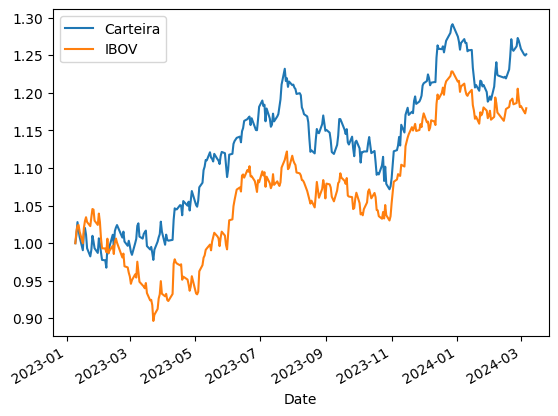

In [54]:
import matplotlib.pyplot as plt

carteira_ajustado.plot(label="Carteira")
ibov_ajustado.plot(label="IBOV")
plt.legend()
plt.show()

In [58]:
retorno_carteira = carteira_ajustado[-1] - 1

retorno_ibov = ibov_ajustado[-1] - 1

print(f"""Retorno Carteira = {retorno_carteira} % \n
Retorno IBOV = {retorno_ibov} %""")

Retorno Carteira = 0.2515481491100009 % 

Retorno IBOV = 0.17959415941113455 %
